In [1]:
import warnings
warnings.filterwarnings("ignore", message=".*use_inf_as_na.*")

# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

#### Data Task

From a data perspective, our objective is to analyze the provided used car dataset to identify the key features that significantly influence car prices. This involves formulating predictive models—specifically, using regression analysis( this a regression problem ) to model the relationship between car attributes (such as make, model, year, mileage, condition, and other relevant features) and their market prices. By applying statistical techniques and supervised machine learning algorithms, we aim to quantify the impact of each variable on the car's price, thus determining the primary factors that drive used car pricing.

##### Objectives
1. Understand the relationship between various features and used car market prices.
2. Build and evaluate multiple regression models to predict used car market prices.
3. Provide actionable insights based on model findings.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

To get familiar with the dataset and identify potential quality issues, we will do the following steps:
1. Display basic information about the dataset
2. Display descriptive statistics
3. Check for missing values
4. Visualize the distribution of the target variable (price)
5. Create box plots to detect outliers of target variable (price)
6. Visualize correlations between features
7. Create histograms for certain features to understand their distribution
8. Analyze the relationship between categorical features and the target variable
9. Explore the geographical distribution of listings and the distribution of manufacturers


#### Data Dictionary

The dataset contains details about car listings across various regions, including attributes like price, condition, and specifications.

1. **id**: Unique identifier for each listing.

2. **region**: The region where the listing is located, generally represented as a city or metropolitan area.

3. **price**: The price of the car in USD.

4. **year**: The manufacturing year of the vehicle.

5. **manufacturer**: The manufacturer or brand of the vehicle (e.g., Ford, Toyota).

6. **model**: The specific model of the car (e.g., Camry, Civic).

7. **condition**: The condition of the car as specified by the seller (e.g., new, like new, excellent, good, fair, salvage).

8. **cylinders**: The number of cylinders in the engine (e.g., 4-cylinder, 6-cylinder).

9. **fuel**: The type of fuel the car uses (e.g., gasoline, diesel, electric, hybrid).

10. **odometer**: The mileage of the vehicle, recorded in miles.

11. **title_status**: The status of the vehicle's title (e.g., clean, salvage, rebuilt, lien).

12. **transmission**: The type of transmission the vehicle has (e.g., automatic, manual, other).

13. **VIN**: Vehicle Identification Number, a unique code used to identify individual motor vehicles.

14. **drive**: The type of drivetrain (e.g., front-wheel drive, rear-wheel drive, all-wheel drive).

15. **size**: The size category of the vehicle (e.g., compact, mid-size, full-size).

16. **type**: The body type of the car (e.g., sedan, SUV, truck, coupe).

17. **paint_color**: The color of the vehicle's exterior paint.

18. **state**: The state where the listing originates from, represented as a two-letter abbreviation (e.g., CA, NY).


In [17]:
#Auto reload is used to ensure changes made to utils show up immediatly
%load_ext autoreload
%autoreload 2

#Import necessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
vehicles_df = pd.read_csv('data/vehicles.csv')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# Display the last few rows of the dataset because the first few rows are not usefule
print("\nLast few rows of the dataset:")
vehicles_df.tail()



Last few rows of the dataset:


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy
426879,7301591129,wyoming,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,gas,22716.0,clean,other,WBA4J1C58KBM14708,rwd,NaN,coupe,NaN,wy


In [4]:
#1. Display basic information about the dataset
print("Dataset info:")
vehicles_df.info()

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  obj

In [5]:

#2. Display descriptive statistics
print("\nSummary statistics of features:")
vehicles_df.describe()




Summary statistics of features:


,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [6]:
#3. Check for missing values
from utils.data_understanding_helpers import analyze_missing_values

analyze_missing_values(vehicles_df)


Missing Values Analysis:
+--------------+------------+------------+
| Feature      |   #Missing | %Missing   |
+==============+============+============+
| id           |          0 | 0.00%      |
+--------------+------------+------------+
| region       |          0 | 0.00%      |
+--------------+------------+------------+
| price        |          0 | 0.00%      |
+--------------+------------+------------+
| year         |       1205 | 0.28%      |
+--------------+------------+------------+
| manufacturer |      17646 | 4.13%      |
+--------------+------------+------------+
| model        |       5277 | 1.24%      |
+--------------+------------+------------+
| condition    |     174104 | 40.79%     |
+--------------+------------+------------+
| cylinders    |     177678 | 41.62%     |
+--------------+------------+------------+
| fuel         |       3013 | 0.71%      |
+--------------+------------+------------+
| odometer     |       4400 | 1.03%      |
+--------------+------------

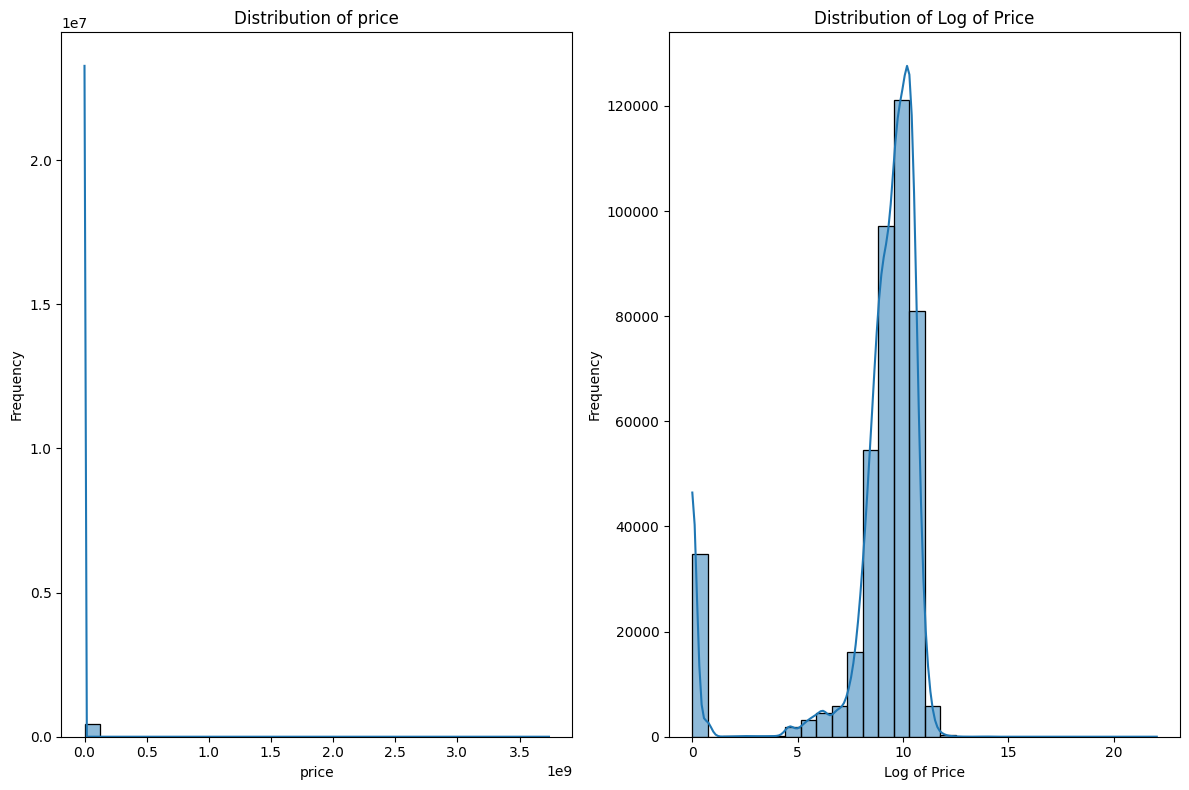

0          8.699681
1          9.384378
2          9.952325
3          7.313887
4          8.497195
            ...    
426875    10.068621
426876    10.328461
426877    10.462846
426878    10.274741
426879    10.328461
Name: Log of Price, Length: 426880, dtype: float64

In [54]:

#4. Visualize the distribution of the target variable (price)
# #We see that the data is skewed to the left, and does not appear to be nomrally distributed. 
# This is better seen by plotting the log of the price.

from utils.data_understanding_helpers import plot_histograms

price = vehicles_df['price']
log_price = np.log1p(price)
log_price.name ='Log of Price'
plot_histograms([price, log_price])


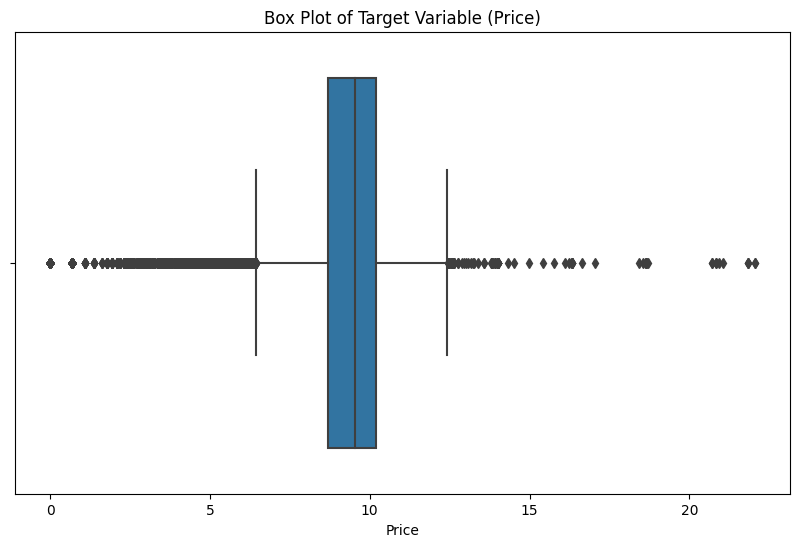

Number of outliers: 21


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state,zscore_price
280,7315849335,birmingham,987654321,1960.0,chevrolet,NaN,NaN,NaN,gas,999999.0,clean,manual,NaN,NaN,NaN,NaN,NaN,al,81.066935
1838,7315961634,dothan,99999999,1993.0,ford,ranger,NaN,NaN,gas,99999.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,al,8.202479
29386,7305265540,humboldt county,1111111111,1999.0,ford,f350 super duty lariat,good,8 cylinders,diesel,149000.0,clean,automatic,NaN,rwd,full-size,pickup,white,ca,91.201074
37409,7314053169,modesto,1111111111,2020.0,jeep,NaN,NaN,NaN,gas,1000.0,clean,automatic,NaN,4wd,NaN,NaN,NaN,ca,91.201074
37410,7314052904,modesto,3009548743,2021.0,chevrolet,NaN,NaN,8 cylinders,gas,1000.0,clean,automatic,NaN,4wd,NaN,NaN,NaN,ca,247.037216
91576,7309730903,delaware,3024942282,2000.0,mercedes-benz,benz e320,NaN,NaN,gas,100000.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,de,248.300818
122470,7315836487,atlanta,987654321,1960.0,chevrolet,NaN,NaN,NaN,gas,9999999.0,clean,manual,NaN,NaN,NaN,NaN,NaN,ga,81.066935
137807,7314339777,spokane / coeur d'alene,123456789,1999.0,buick,regal,like new,6 cylinders,gas,96000.0,clean,automatic,NaN,fwd,full-size,sedan,white,id,10.127966
153082,7305153975,indianapolis,1234567890,2006.0,volvo,vnl,fair,NaN,other,200000.0,clean,manual,NaN,NaN,NaN,NaN,black,in,101.335211
184704,7304345156,frederick,1410065407,1989.0,jeep,wrangler,NaN,NaN,diesel,103000.0,clean,manual,NaN,NaN,NaN,SUV,NaN,md,115.741192


In [33]:
# 5. Create box plots to detect outliers of target variable (price)
from utils.data_understanding_helpers import find_outliers

#Create a log box plot of price to better visualize the outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=(np.log1p(vehicles_df['price'].dropna())))
plt.title('Box Plot of Target Variable (Log(Price))')
plt.xlabel('Log(Price)')
plt.show()

outliers = find_outliers(vehicles_df, ['price'], 2)
print(f"Number of outliers: {len(outliers)}")
outliers



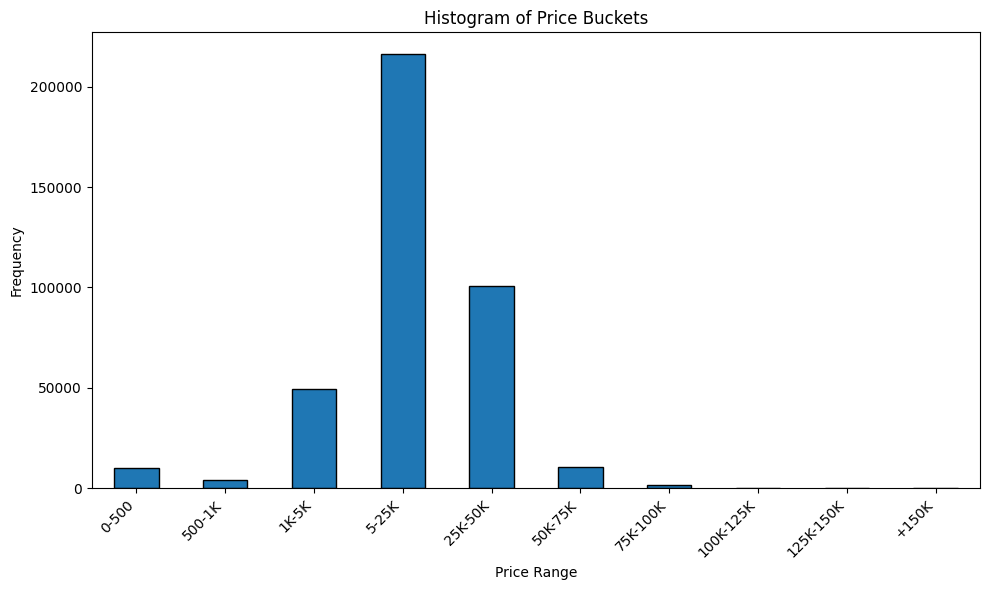

In [59]:
# Create a histogram of prices
bins = [0, 500, 1000, 5000, 25000, 50000, 75000, 100000, 125000, 150000, 1_000_000]
labels = ['0-500','500-1K', '1K-5K', '5-25K', '25K-50K', '50K-75K', '75K-100K', '100K-125K', '125K-150K', '+150K']

# Create a new column 'price_bucket' based on the defined bins
price_bucket= pd.cut(vehicles_df['price'], bins=bins, labels=labels)

# Create the histogram based on the 'price_bucket' column
plt.figure(figsize=(10, 6))
price_bucket.value_counts(sort=False).plot(kind='bar', edgecolor='black')
plt.title('Histogram of Price Buckets')
plt.xlabel('Price Range')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

Findings: 
- There are 21 outliers in the dataset that are signfiicantly skewing the data.
- The overall distribution looks skewed, with more outliers on the lower side than the upper, suggesting a possible negative skewness in the price distribution.

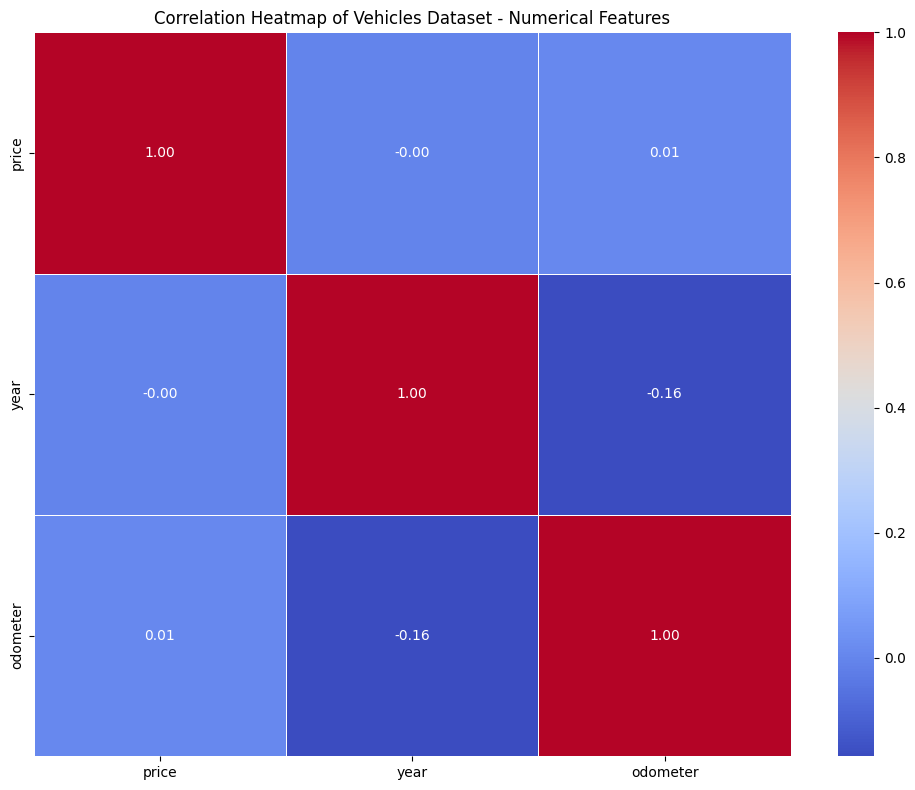

In [37]:
# 6. Visualize correlations between features
from utils.data_understanding_helpers import plot_correlation_matrix

#Drop the id column as it is not a feature
plot_correlation_matrix(vehicles_df.drop('id', axis=1, errors='ignore'), 'Vehicles Dataset - Numerical Features')



Findings:
- There seems to be a weak negative correlation between year and odometer. This suggests that as the car gets older, the odometer reading increases.
- Suprisingly, there isn't any correlation between price and any of the numerical features(). This suggests that the price is not driven by the numerical features.

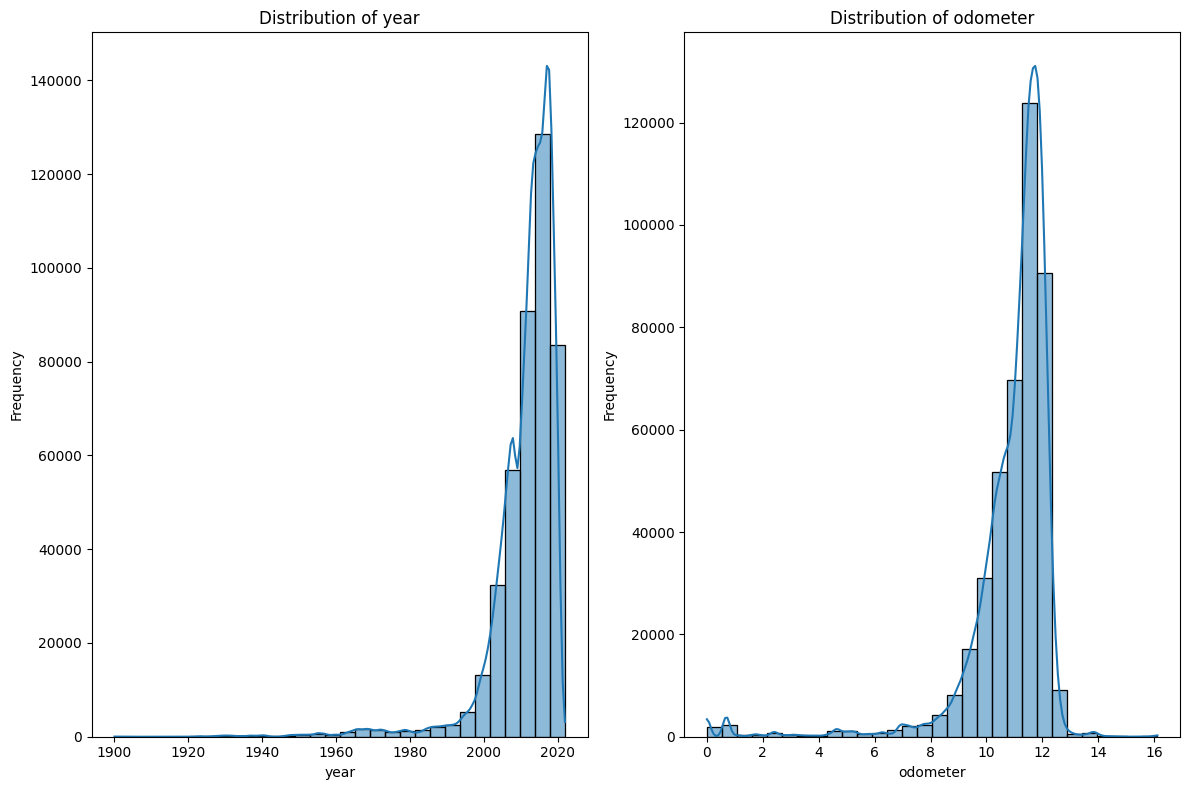

In [58]:
# 7. Create histograms for certain features to understand their distribution

plot_histograms([vehicles_df['year'],  vehicles_df['odometer'].apply(np.log1p)])

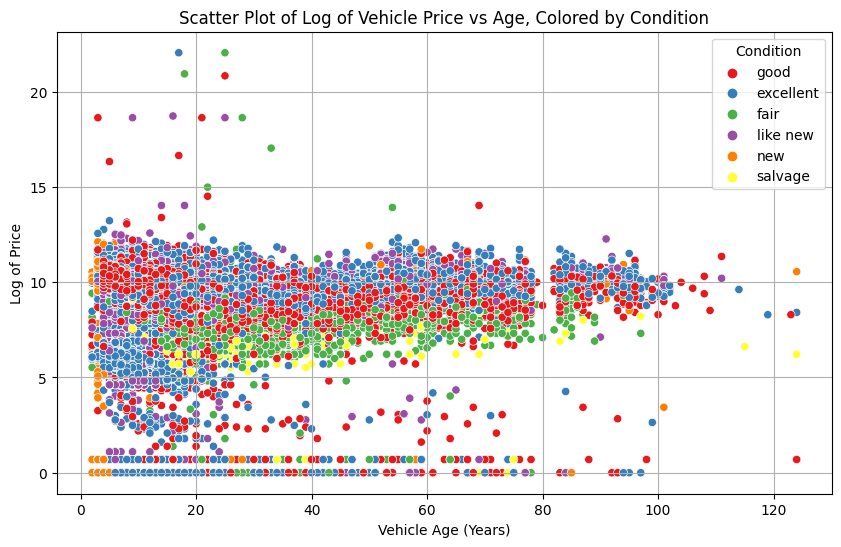

In [56]:

#8. Analyze the relationship between categorical features and the target variable

#Plotting the relationship between the age of the car and its price, colored by the condition of the car
# Calculate the age of the vehicles
current_year = 2024  # replace with the current year
vehicles_df['age'] = current_year - vehicles_df['year']

# Apply the logarithmic transformation to the price
vehicles_df['log_price'] = np.log1p(vehicles_df['price'])

# Create a scatter plot of log(price) vs. age, with condition as hue
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='log_price', hue='condition', data=vehicles_df, palette='Set1')
plt.title('Scatter Plot of Log of Vehicle Price vs Age, Colored by Condition')
plt.xlabel('Vehicle Age (Years)')
plt.ylabel('Log of Price')
plt.legend(title='Condition')
plt.grid(True)
plt.show()


Key Findings:
- There are a few outliers in both price and age. For instance, some vehicles that are over 100 years old still have relatively high prices (log price above 10), indicating possible collector or antique value.
- There are also high-priced vehicles at low ages, which might represent luxury or rare cars that maintain a high price even when new.
- There are clearly some erounous values in the data. (e.g cars older than 120 years old or price of 0)

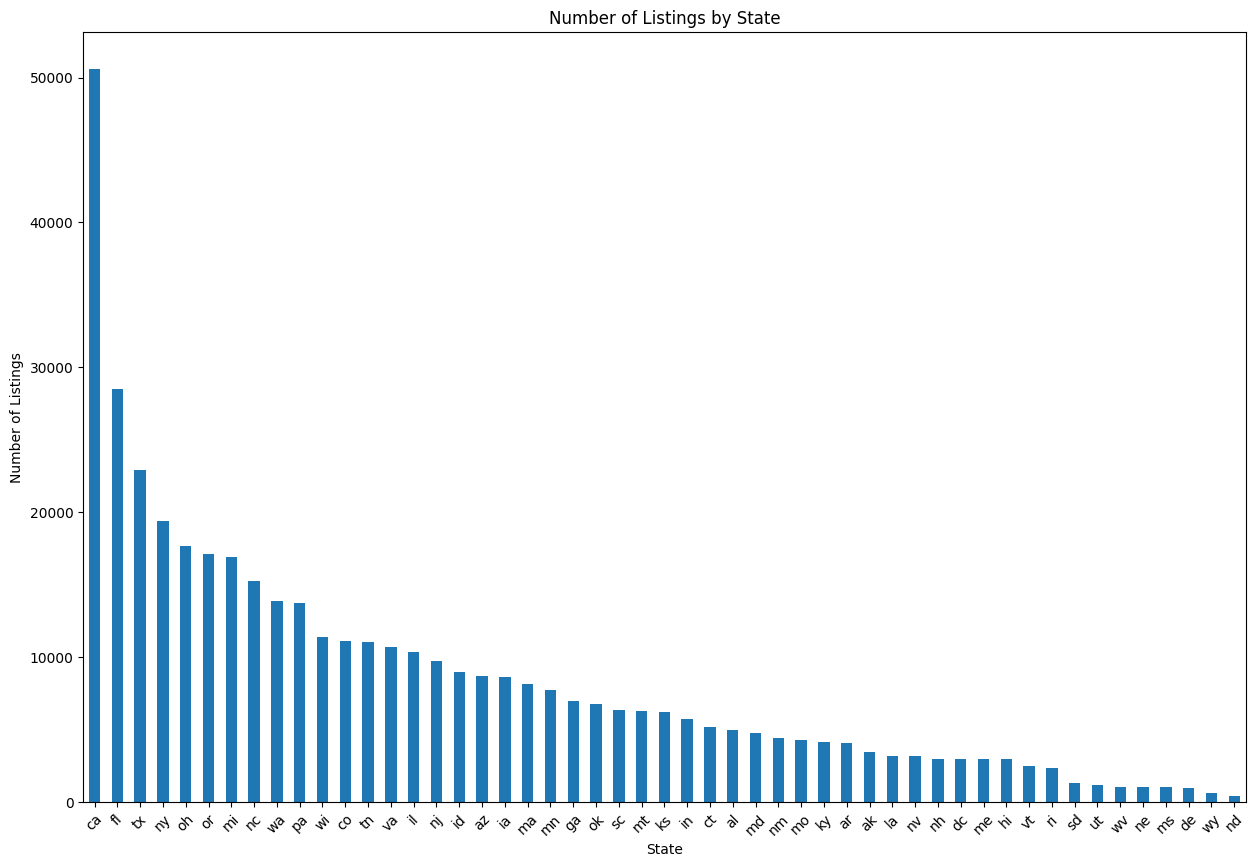

In [64]:
#9. Explore the geographical distribution of listings and the distribution of manufacturers
# Explore the geographical distribution of listings
plt.figure(figsize=(15, 10))
vehicles_df['state'].value_counts().plot(kind='bar')
plt.title('Number of Listings by State')
plt.xlabel('State')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.show()

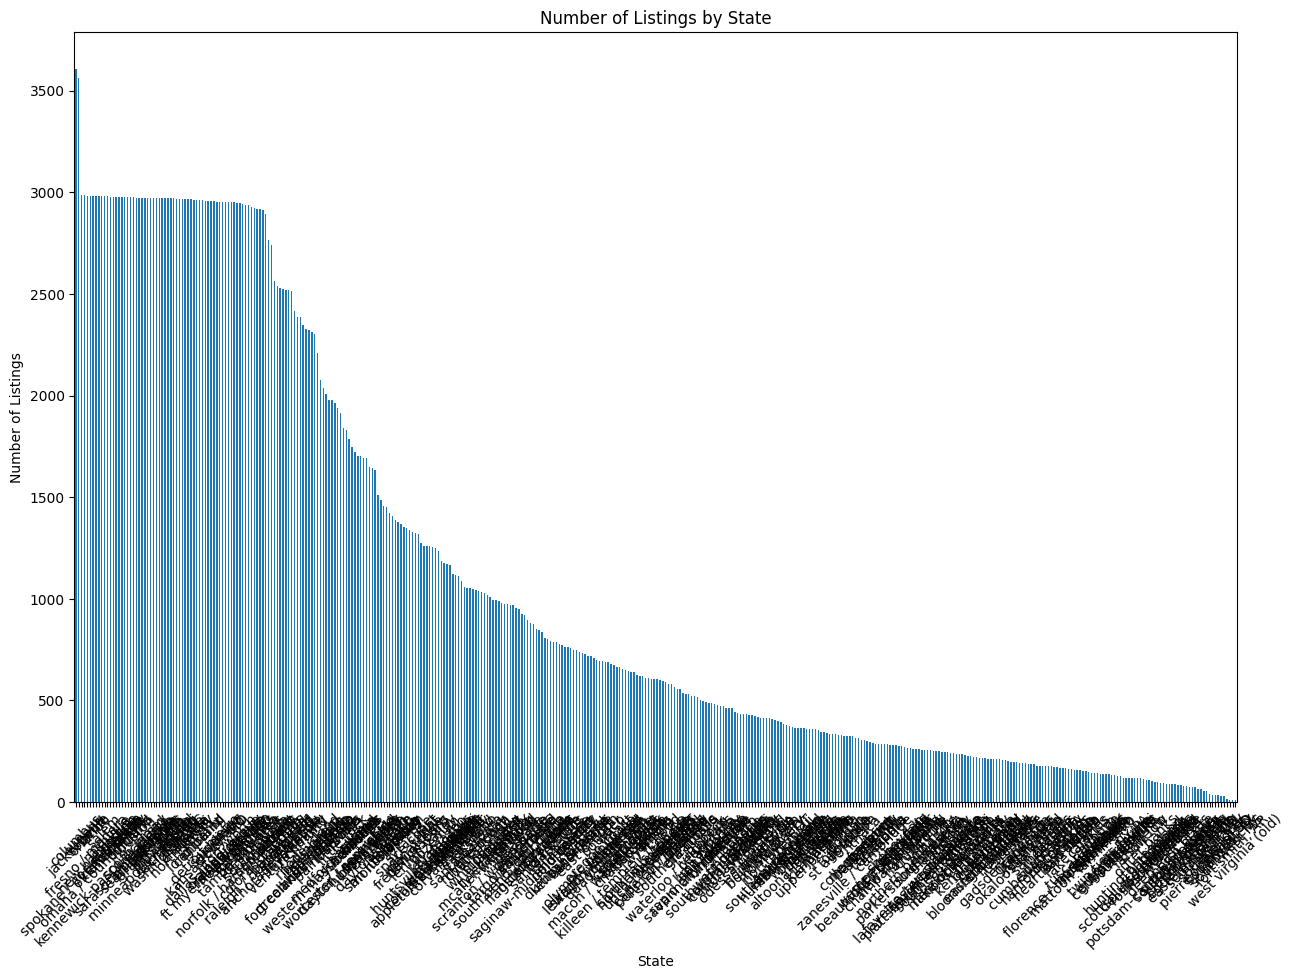

404

In [67]:
# Explore the geographical distribution of listings
plt.figure(figsize=(15, 10))
vehicles_df['region'].value_counts().plot(kind='bar')
plt.title('Number of Listings by State')
plt.xlabel('State')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.show()

#count unique regions
len(vehicles_df['region'].unique())


In [65]:
import plotly.express as px
# Create a histogram with manufacturer
manufacturer_counts = vehicles_df['manufacturer'].dropna().value_counts().reset_index()
manufacturer_counts.columns = ['manufacturer', 'count']

fig = px.bar(manufacturer_counts, x='manufacturer', y='count', title='Distribution of Manufacturers')
fig.update_layout(xaxis_title='Manufacturer', yaxis_title='Frequency', xaxis_tickangle=-45)
fig.show()

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

#### Data Cleaning


In this section, we performed data cleaning and preparation to ensure the dataset is ready for modeling. The steps taken include:
 
1. Converted the 'year' column to 'age' by subtracting the manufacturing year from the current year.
2. Selected columns that are important and do not have a large amount of missing values.
3. Dropped rows with null values in the selected columns.
4. Removed rows with outliers in the 'price' column.
5. Ensured there are no missing values in the cleaned dataset.

In [68]:
from utils.data_prep_helpers import drop_outliers

#convert year to age by subtracting the manufacturing year from the current year
vehicles_df['age'] = 2024 - vehicles_df['year']

# Select only the columns that seem important, and do not large amount of missing values
# removed 'id', 'region', 'VIN', 'drive', 'size', 'paint_color' as they are not useful for this analysis because they are null 
# in more than 20% of the dataset or because they have a large number of unique values that would not be useful for this analysis
selected_columns = [
    'price', 'age', 'manufacturer', 'title_status', 'odometer',
    'state', 'fuel', 'transmission','condition','type', 'model'
]

#Drop rows with missing values in the selected columns
vehicles_df_selected = vehicles_df[selected_columns].copy()

# Replace nulls or empty values in 'condition' and 'type' with "unknown"
vehicles_df_selected['condition'].fillna('unknown', inplace=True)
vehicles_df_selected['type'].fillna('other', inplace=True)

#drop the nulls values in the selected columns
vehicles_df_selected.dropna(inplace=True)

#remove rows with astronomically high values/outliers
vehicles_df_reduced = drop_outliers(
    vehicles_df_selected, 
    ['price']
)

In [70]:
#Review selected dataset

#get unique values in categorical columns
unique_values_dict = {}
for column in vehicles_df_reduced.select_dtypes(include=['object']).columns:
    unique_values_dict[column] = vehicles_df_reduced[column].unique().tolist()

print("\nUnique values in categorical columns:")
for column, unique_values in unique_values_dict.items():
    print(f"{column}: {unique_values}")

# Get count of 'other' for 'fuel' and 'transmission'
fuel_other_count = vehicles_df_reduced[vehicles_df_reduced['fuel'] == 'other'].shape[0]
transmission_other_count = vehicles_df_reduced[vehicles_df_reduced['transmission'] == 'other'].shape[0]

print(f"Count of 'other' in 'fuel': {fuel_other_count}")
print(f"Count of 'other' in 'transmission': {transmission_other_count}")




Unique values in categorical columns:
manufacturer: ['gmc', 'chevrolet', 'toyota', 'ford', 'jeep', 'nissan', 'ram', 'mazda', 'cadillac', 'honda', 'dodge', 'lexus', 'jaguar', 'buick', 'chrysler', 'volvo', 'audi', 'infiniti', 'lincoln', 'alfa-romeo', 'subaru', 'acura', 'hyundai', 'mercedes-benz', 'bmw', 'mitsubishi', 'volkswagen', 'porsche', 'kia', 'ferrari', 'mini', 'pontiac', 'fiat', 'rover', 'tesla', 'saturn', 'mercury', 'harley-davidson', 'datsun', 'aston-martin', 'land rover']
title_status: ['clean', 'rebuilt', 'lien', 'salvage', 'missing', 'parts only']
state: ['al', 'ak', 'az', 'ar', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'id', 'il', 'in', 'ia', 'ks', 'ky', 'la', 'me', 'md', 'ma', 'mi', 'mn', 'ms', 'mo', 'mt', 'nc', 'ne', 'nv', 'nj', 'nm', 'ny', 'nh', 'nd', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'vt', 'va', 'wa', 'wv', 'wi', 'wy']
fuel: ['gas', 'other', 'diesel', 'hybrid', 'electric']
transmission: ['other', 'automatic', 'manual']
condition: ['good',

#### Split dataset into train, test

In [72]:
from sklearn.model_selection import train_test_split
X = vehicles_df_reduced.drop('price', axis=1)
y = vehicles_df_reduced['price']  #log transform the target variable to reduce skewness

#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#### Preprocessing and Feature Engineering

In [73]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

# Define Preprocessing Steps

# For numerical features, we'll apply StandardScaler
numerical_features = ['age', 'odometer']
numerical_transformer = StandardScaler()

# For categorical features, we'll apply OneHotEncoder
categorical_features = ['manufacturer', 'fuel', 'transmission', 'type', 'state', 'model']
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

# For ordinal features, we'll apply OrdinalEncoder
# Define the categories for the ordinal features in the desired order
title_status_order = ['missing', 'parts only', 'salvage', 'lien', 'rebuilt', 'clean']
condition_order = ['unknown', 'salvage', 'fair', 'good', 'like new', 'excellent', 'new']
ordinal_features = ['title_status', 'condition']
ordinal_categories = [
    title_status_order,
    condition_order
]
ordinal_transformer = OrdinalEncoder(categories=ordinal_categories)

# Create ColumnTransformer to apply transformations to specific columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features),
        ('ord', ordinal_transformer, ordinal_features)
    ]
)

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

#### Create Baseline Model

In [76]:
from utils.data_modelling_helpers import train_baseline_model

#Train Baseline Model for comparison of future models
baseline_model = train_baseline_model(X_train, y_train, cv=5, scoring='neg_mean_squared_error', problem_type='regression')



Baseline model for regression (predicts the mean value) is trained.
Training Baseline(regression) model...


### Setup Pipeline 

Setup the pipeline to be used for model training models in grid search. Inserting Linear Regression as a placeholder model that will be targetted and swapped out during model selection.


In [77]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor), 
    ('poly', PolynomialFeatures()),
    ('model', LinearRegression())
])

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.